In [1]:
import os
import sys
import os.path as path
import numpy as np
import pandas as pd
import csv
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

In [2]:
from TrainModel_Helper import *

In [3]:
json_files_base_loc = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson'

In [4]:
json_extract_base = os.path.join(json_files_base_loc, 'Extract/json_extract_data')
json_extract_counts = [2, 3, 4, 5, 6, 7, 8]

In [5]:
json_prep_base = os.path.join(json_files_base_loc, 'Prep/json_prep_data_label')
json_prep_counts = [1]

In [6]:
json_train_base = os.path.join(json_files_base_loc, 'Train/json_train_model')
json_train_counts = [4, 1, 2, 3, 5]

In [7]:
trained_models_metrics = dict()

In [10]:
for label_count in json_prep_counts:
    metric_for_label = dict()
    json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
    #print(json_prep)
    with open(json_prep) as json_file_handle:
        json_content_prep_data = json.load(json_file_handle)
    label_count = json_content_prep_data['label_defn']['label_count']
    FM_label_type = json_content_prep_data['FM_labels']['label_type']
    #print('label_count: {}, FM_label_type: {}'.format(label_count, FM_label_type))
    
    for train_count in json_train_counts:
        metric_for_model = dict()
        json_train   = '%s_%03d.json'%(json_train_base, train_count)
        #print(json_train)
        with open(json_train) as json_file_handle:
            json_content_train_model = json.load(json_file_handle)
        model_count = json_content_train_model['models']['model_count']
        model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
        #print('Model Count: {}, Model Name: {}'.format(model_count, model_name))

        accuracy_train = []
        accuracy_test = []
        data_nomenclature = []
        for data_count in json_extract_counts:
            data_nomenclature.append(data_count)
            
            json_extract = '%s_%03d.json'%(json_extract_base, data_count)
            #print(json_extract)
            with open(json_extract) as json_file_handle:
                json_content_extract_data = json.load(json_file_handle)
            data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
            #print('Data Set Count: {}'.format(data_set_count))
            
            # Names of trained model and related files
            trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
            trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                        label_count, FM_label_type, \
                                                        model_count, model_name)

            trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
            model_eval_file = '{}_eval'.format(trained_model_name)
            model_metric_file = os.path.join(trained_model_loc, model_eval_file+'.csv')
            #trained_model_file_name = '{}.pkl'.format(trained_model_name)
            #print('Trained Model Location: {}'.format(trained_model_loc))
            #print('Trained Model Metrric File: {}'.format(model_metric_file))
            
            eval_metric = pd.read_csv(model_metric_file).to_dict(orient='records')[0]
            #print('Eval Metrics: {}'.format(eval_metric))
            accuracy_train.append(eval_metric['accuracy_train'])
            accuracy_test.append(eval_metric['accuracy_test'])
            #print('\n')
            
        #print('label_count: {}, FM_label_type: {}, Model Count: {}, Model Name: {}'.format(
         #   label_count, FM_label_type, model_count, model_name))
        #print('data_nomenclature: {}'.format(data_nomenclature))
        #print('accuracy_train: {}'.format(accuracy_train))
        #print('accuracy_test: {}'.format(accuracy_test))
        
        metric_for_model['data_nomenclature'] = data_nomenclature
        metric_for_model['accuracy_train'] = accuracy_train
        metric_for_model['accuracy_test'] = accuracy_test
        
        #print('metric_for_model: \n{}'.format(metric_for_model))
        #print('\n')
        metric_for_label[model_name] = metric_for_model
        
    #print('metric_for_label: \n{}'.format(metric_for_label))
    #print('\n')
    
    trained_models_metrics[FM_label_type] =  metric_for_label
    
print('trained_models_metrics: \n{}'.format(trained_models_metrics))
#print('\n')            

trained_models_metrics: 
{'Regression': {'Linear': {'data_nomenclature': [2, 3, 4, 5, 6, 7, 8], 'accuracy_train': [0.5301362425838607, 0.5218272613851505, 0.5058439312497303, 0.487961268962724, 0.5132804779575639, 0.5187901118595718, 0.4952215235448444], 'accuracy_test': [0.5305331755641216, 0.5299467062537022, 0.5072506823993339, 0.4878827865699031, 0.5208072212299857, 0.5142419294492677, 0.4999084336143872]}, 'MLP': {'data_nomenclature': [2, 3, 4, 5, 6, 7, 8], 'accuracy_train': [0.5919321564338007, 0.5740100018554091, 0.5822299436623662, 0.542927077107027, 0.6060788840924498, 0.5740942009962782, 0.5670281664880215], 'accuracy_test': [0.5826555973655323, 0.5685292286527546, 0.5794551608583233, 0.5368337620836166, 0.6103825571147281, 0.5693745909135168, 0.5718621153582948]}, 'SVM': {'data_nomenclature': [2, 3, 4, 5, 6, 7, 8], 'accuracy_train': [0.5653421900826594, 0.5359299179860006, 0.5549042144300405, 0.5799527882951766, 0.5525706098580256, 0.5507710195889051, 0.5534327591391499], 'a

In [11]:
ds_name = np.array(data_nomenclature)
ds_name

array([2, 3, 4, 5, 6, 7, 8])

In [12]:
models = list(trained_models_metrics['Regression'].keys())
models

['Linear', 'MLP', 'SVM', 'RF', 'GB']

Text(0.5, 1.0, 'Test')

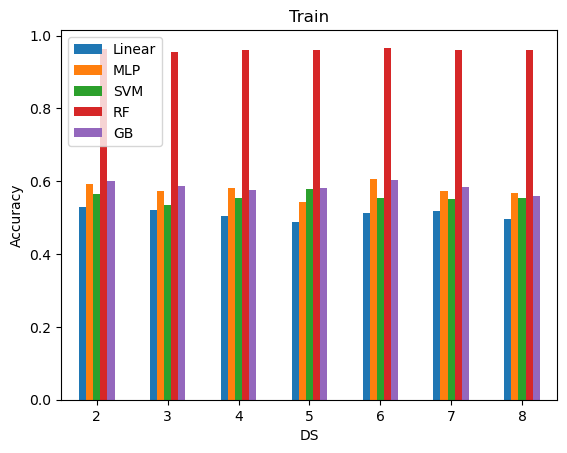

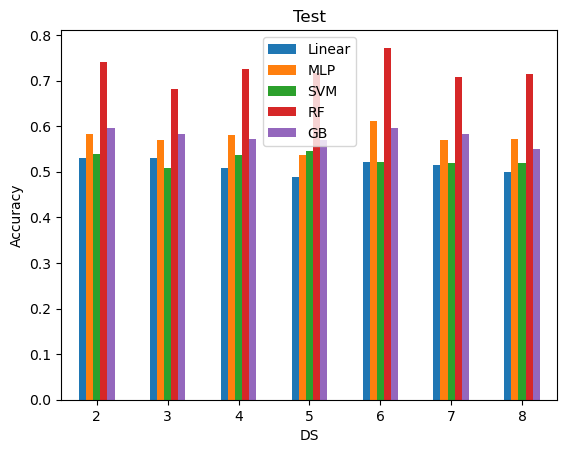

In [13]:
label = 'Regression'
train_accuracy_all_models = dict()
test_accuracy_all_models = dict()
for model in models:
    train_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_train']
    test_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_test']
    
    df_train = pd.DataFrame(train_accuracy_all_models, index = ds_name)
    df_test  = pd.DataFrame(test_accuracy_all_models, index = ds_name)
    
ax1 = df_train.plot.bar(rot = 0)
ax1.set_xlabel('DS')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train')

ax2 = df_test.plot.bar(rot = 0)
ax2.set_xlabel('DS')
ax2.set_ylabel('Accuracy')
ax2.set_title('Test')

In [14]:
df_train

,Linear,MLP,SVM,RF,GB
2,0.530136,0.591932,0.565342,0.963739,0.600814
3,0.521827,0.574010,0.535930,0.955886,0.585846
4,0.505844,0.582230,0.554904,0.961207,0.576629
5,0.487961,0.542927,0.579953,0.960679,0.580773
6,0.513280,0.606079,0.552571,0.966584,0.602637
7,0.518790,0.574094,0.550771,0.959123,0.584743
8,0.495222,0.567028,0.553433,0.960153,0.559562


In [15]:
df_test

,Linear,MLP,SVM,RF,GB
2,0.530533,0.582656,0.538266,0.741585,0.595587
3,0.529947,0.568529,0.507845,0.681831,0.583574
4,0.507251,0.579455,0.535911,0.725356,0.572503
5,0.487883,0.536834,0.545958,0.717070,0.568462
6,0.520807,0.610383,0.522398,0.771911,0.594864
7,0.514242,0.569375,0.519876,0.708345,0.582162
8,0.499908,0.571862,0.519140,0.715172,0.550503


## Scatter Plots

In [16]:
json_extract_counts = [4, 5, 6] #[2, 3, 4, 5, 6, 7, 8]
json_prep_counts = [1]
json_train_counts = [1, 3, 5]

In [17]:
max_data_size_scatter = 800
fig_size_x = 8
fig_size_y = 8
font_size  = 10
x_lim      = [0, 0.7]

In [18]:
data_identifier = "Train"

Prediction Time for Train Data is 0.078 s
Accuracy for Train Data is: 0.5822299436623662
Prediction Time for Train Data is 0.035 s
Accuracy for Train Data is: 0.542927077107027
Prediction Time for Train Data is 0.043 s
Accuracy for Train Data is: 0.6060788840924498
Prediction Time for Train Data is 23.975 s
Accuracy for Train Data is: 0.9612067768284126
Prediction Time for Train Data is 3.228 s
Accuracy for Train Data is: 0.9606786285279172
Prediction Time for Train Data is 12.916 s
Accuracy for Train Data is: 0.9665842691150688
Prediction Time for Train Data is 0.565 s
Accuracy for Train Data is: 0.5766290815104207
Prediction Time for Train Data is 0.104 s
Accuracy for Train Data is: 0.580772980093109
Prediction Time for Train Data is 0.309 s
Accuracy for Train Data is: 0.6026368214842444


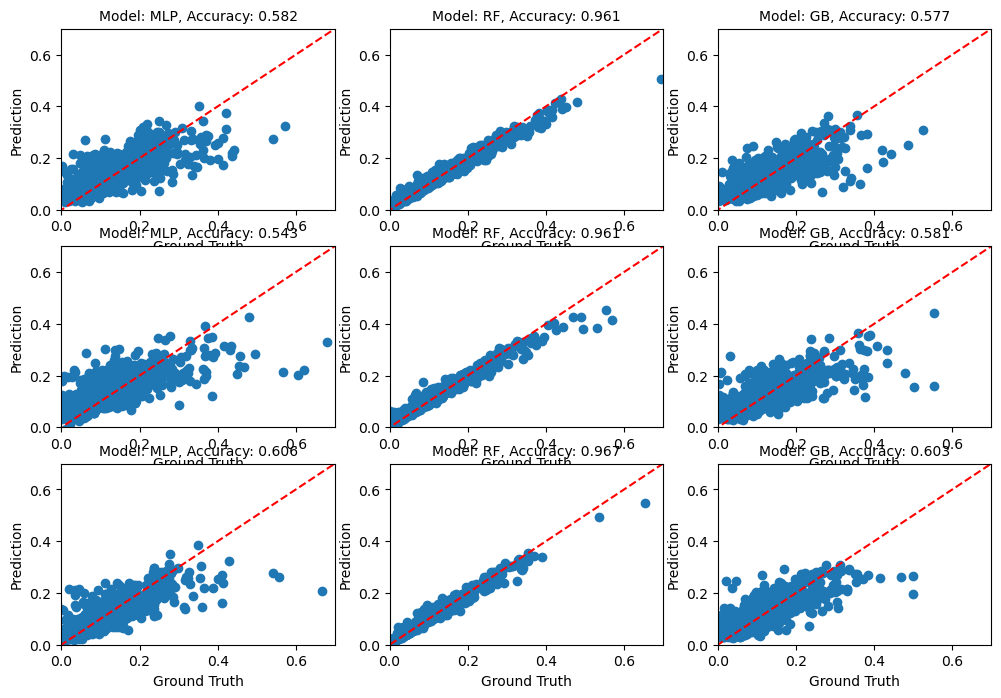

In [19]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        #print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      

In [20]:
data_identifier = "Test"

Prediction Time for Test Data is 0.019 s
Accuracy for Test Data is: 0.5794551608583233
Prediction Time for Test Data is 0.004 s
Accuracy for Test Data is: 0.5368337620836166
Prediction Time for Test Data is 0.011 s
Accuracy for Test Data is: 0.6103825571147281
Prediction Time for Test Data is 6.672 s
Accuracy for Test Data is: 0.725355751259118
Prediction Time for Test Data is 0.972 s
Accuracy for Test Data is: 0.71707008629907
Prediction Time for Test Data is 3.358 s
Accuracy for Test Data is: 0.7719107802453864
Prediction Time for Test Data is 0.136 s
Accuracy for Test Data is: 0.5725032685920952
Prediction Time for Test Data is 0.027 s
Accuracy for Test Data is: 0.5684624790287133
Prediction Time for Test Data is 0.078 s
Accuracy for Test Data is: 0.5948639609567123


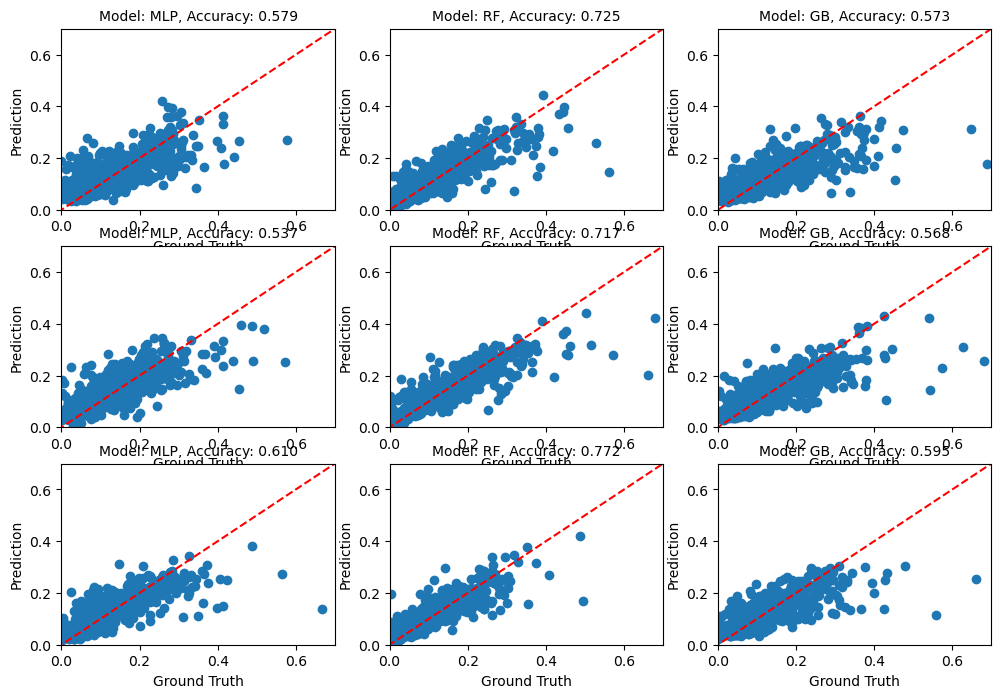

In [21]:
label_count = 1 # Regression
json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
#print(json_prep)
with open(json_prep) as json_file_handle:
    json_content_prep_data = json.load(json_file_handle)
label_count = json_content_prep_data['label_defn']['label_count']
FM_label_type = json_content_prep_data['FM_labels']['label_type']
#print('label_count: {}, FM_label_type: {}\n'.format(label_count, FM_label_type))


fig, ax = plt.subplots(len(json_extract_counts), len(json_train_counts), figsize=(12, 8))

for train_count_ind, train_count in enumerate(json_train_counts):
    json_train   = '%s_%03d.json'%(json_train_base, train_count)
    #print(json_train)
    with open(json_train) as json_file_handle:
        json_content_train_model = json.load(json_file_handle)
    model_count = json_content_train_model['models']['model_count']
    model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
    #print('Model Count: {}, Model Name: {}\n'.format(model_count, model_name))

    for data_count_ind, data_count in enumerate(json_extract_counts):
        json_extract = '%s_%03d.json'%(json_extract_base, data_count)
        #print(json_extract)
        with open(json_extract) as json_file_handle:
            json_content_extract_data = json.load(json_file_handle)
        data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
        #print('Data Set Count: {}'.format(data_set_count))

        # Names of trained model and related files
        trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
        trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                    label_count, FM_label_type, \
                                                    model_count, model_name)

        trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
        trained_model_file_name = '{}_model.pkl'.format(trained_model_name)
        
        train_data_features_file_name  = '{}_features_train.pkl'.format(trained_model_name)
        train_data_labels_file_name    = '{}_labels_train.pkl'.format(trained_model_name)

        test_data_features_file_name   = '{}_features_test.pkl'.format(trained_model_name)
        test_data_labels_file_name     = '{}_labels_test.pkl'.format(trained_model_name)
        
        #print('trained_model_file_name: {}'.format(trained_model_file_name))
        #print('train_data_features_file_name: {}'.format(train_data_features_file_name))
        #print('train_data_labels_file_name: {}'.format(train_data_labels_file_name))
        #print('test_data_features_file_name: {}'.format(test_data_features_file_name))
        #print('test_data_labels_file_name: {}'.format(test_data_labels_file_name))
        
        trained_model_file = os.path.join(trained_model_loc, trained_model_file_name)
        model = pickle.load(open(trained_model_file, 'rb'))
        #print ('\nLoaded the ML model file at: {}\n'.format(trained_model_file))
        #print ('The model loaded is: {} \n'.format(model))
        
        if (data_identifier == "Train"):
            #print('Loading the saved features and labels used in training')
            features_train = pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_features_file_name), 'rb'))
            labels_train   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, train_data_labels_file_name), 'rb'))
            labels_pred_train = predict(model, features_train, "Train Data")
            accuracy_train = get_accuracy_score(model, FM_label_type, \
                                   features_train, labels_train, labels_pred_train,\
                                   "Train Data")
            labels_gt = labels_train
            labels_pred = labels_pred_train
            accuracy = accuracy_train
        else:
            #print('Loading the saved features and labels meant for testing')
            features_test = pickle.load(open(os.path.join(\
                            trained_model_loc, test_data_features_file_name), 'rb'))
            labels_test   =  pickle.load(open(os.path.join(\
                                    trained_model_loc, test_data_labels_file_name), 'rb'))
            labels_pred_test = predict(model, features_test, "Test Data")
            accuracy_test = get_accuracy_score(model, FM_label_type, \
                                   features_test, labels_test, labels_pred_test,\
                                   "Test Data")
            
            labels_gt = labels_test
            labels_pred = labels_pred_test
            accuracy = accuracy_test
        
        labels_gt_range = [labels_gt.min(), labels_gt.max()]
        data_indices = range(len(labels_gt))
        if (max_data_size_scatter < 1):
            data_ind_subset = data_indices
        else:
            data_ind_subset = random.sample(data_indices, k = max_data_size_scatter)
            
        ax[data_count_ind, train_count_ind].scatter(labels_gt[data_ind_subset], labels_pred[data_ind_subset])
        ax[data_count_ind, train_count_ind].plot(labels_gt_range, labels_gt_range, '--r')
        ax[data_count_ind, train_count_ind].set_xlabel('Ground Truth', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_ylabel('Prediction', fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_title('Model: {}, Accuracy: {:.3f}'.format(model_name, accuracy), fontsize = font_size)
        ax[data_count_ind, train_count_ind].set_xlim(x_lim)
        ax[data_count_ind, train_count_ind].set_ylim(x_lim)
        #ax[data_count_ind, train_count_ind].set_yticks(fontsize = font_size, rotation = 0)
        #ax[data_count_ind, train_count_ind].set_xticks(fontsize = font_size, rotation = 0)
        #print('\n')

#print('\n')      